In [11]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go
# import graphviz, pydotplus
from IPython.display import Image
import re

font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=3)

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier,export_graphviz

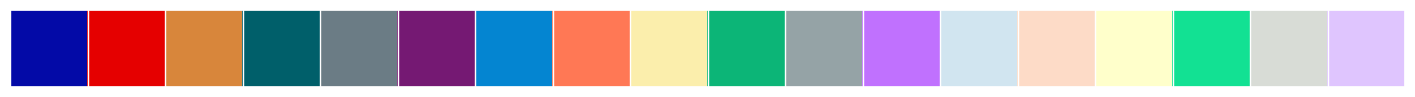

In [13]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [14]:
def formatPct(pct, allvals):
    total = int(round(pct/100. * np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, total)   

In [15]:
def affichageDistribution(colonne,couleur,ax, nom=''):
    graph = sns.distplot(colonne, color=couleur, ax=ax)
    graph.set(ylabel=None)
    moyenne, mediane = float(colonne.mean()), \
                   float(colonne.median())
    
    ax.axvline(moyenne, color='g', linestyle='-', label=f"{nom:12s} mean   = {moyenne:0.4f}", lw=2)
    ax.axvline(mediane, color='b', linestyle='--', label=f"{nom:12s} median = {mediane:0.4f}", lw=2)
    graph.legend(loc="upper right")

In [16]:
donnees = pd.read_csv("../donnees/penguins_size.csv").iloc[:,1:]
donnees.sample(5)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
256,Biscoe,42.6,13.7,213.0,4950.0,FEMALE
72,Torgersen,39.6,17.2,196.0,3550.0,FEMALE
162,Dream,46.6,17.8,193.0,3800.0,FEMALE
53,Biscoe,42.0,19.5,200.0,4050.0,MALE
98,Dream,33.1,16.1,178.0,2900.0,FEMALE


In [17]:
donnees.columns

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [18]:
qualitatives = ['sex', 'island']
quantitatives = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g']

In [19]:
donnees.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


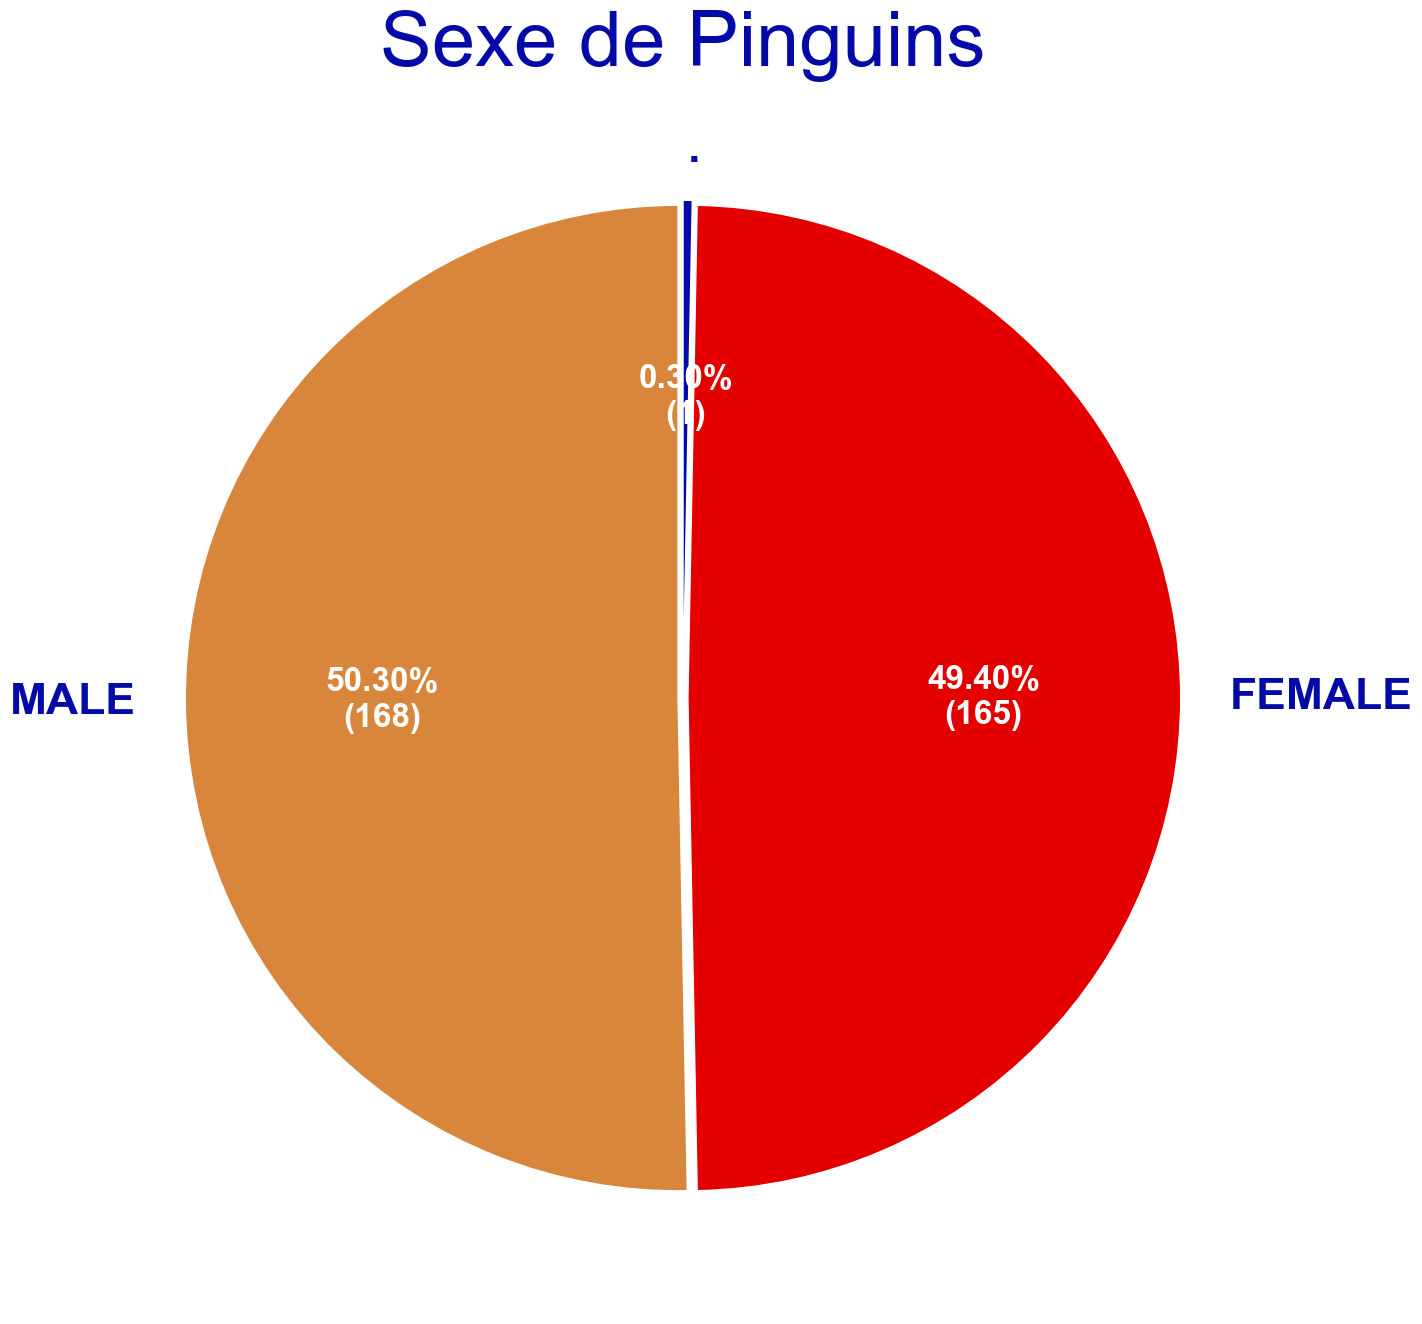

In [20]:
radius,size=0.8,0.3
fig,ax = plt.subplots(ncols=1,figsize=(16,16), subplot_kw=dict(aspect="equal"))

affichage = donnees.groupby('sex').island.count().reset_index().rename(columns={'island':'nombre'})
affichage['%'] = affichage.nombre * 100 / affichage.nombre.sum()
affichage

wedges, texts, autotexts =  ax.pie(
         affichage['nombre'],
         autopct=lambda pct: formatPct(pct, affichage.nombre.values),   # autopct='%1.2f%%', 
         labels=affichage.sex.values,
         # shadow=True, 
         counterclock=False,
         startangle=90 ,
         colors = palette,
         # pctdistance=0.4, 
         labeldistance=1.1, 
         textprops=dict(color="#030aa7"),
         explode=[0.01 for _ in range(affichage.sex.count())]
      );
plt.setp(autotexts, size=24, weight="bold",color="w")
plt.setp(texts, size=32, weight="bold");
ax.set_title("Sexe de Pinguins",fontdict=dict(color="#030aa7", size=56));

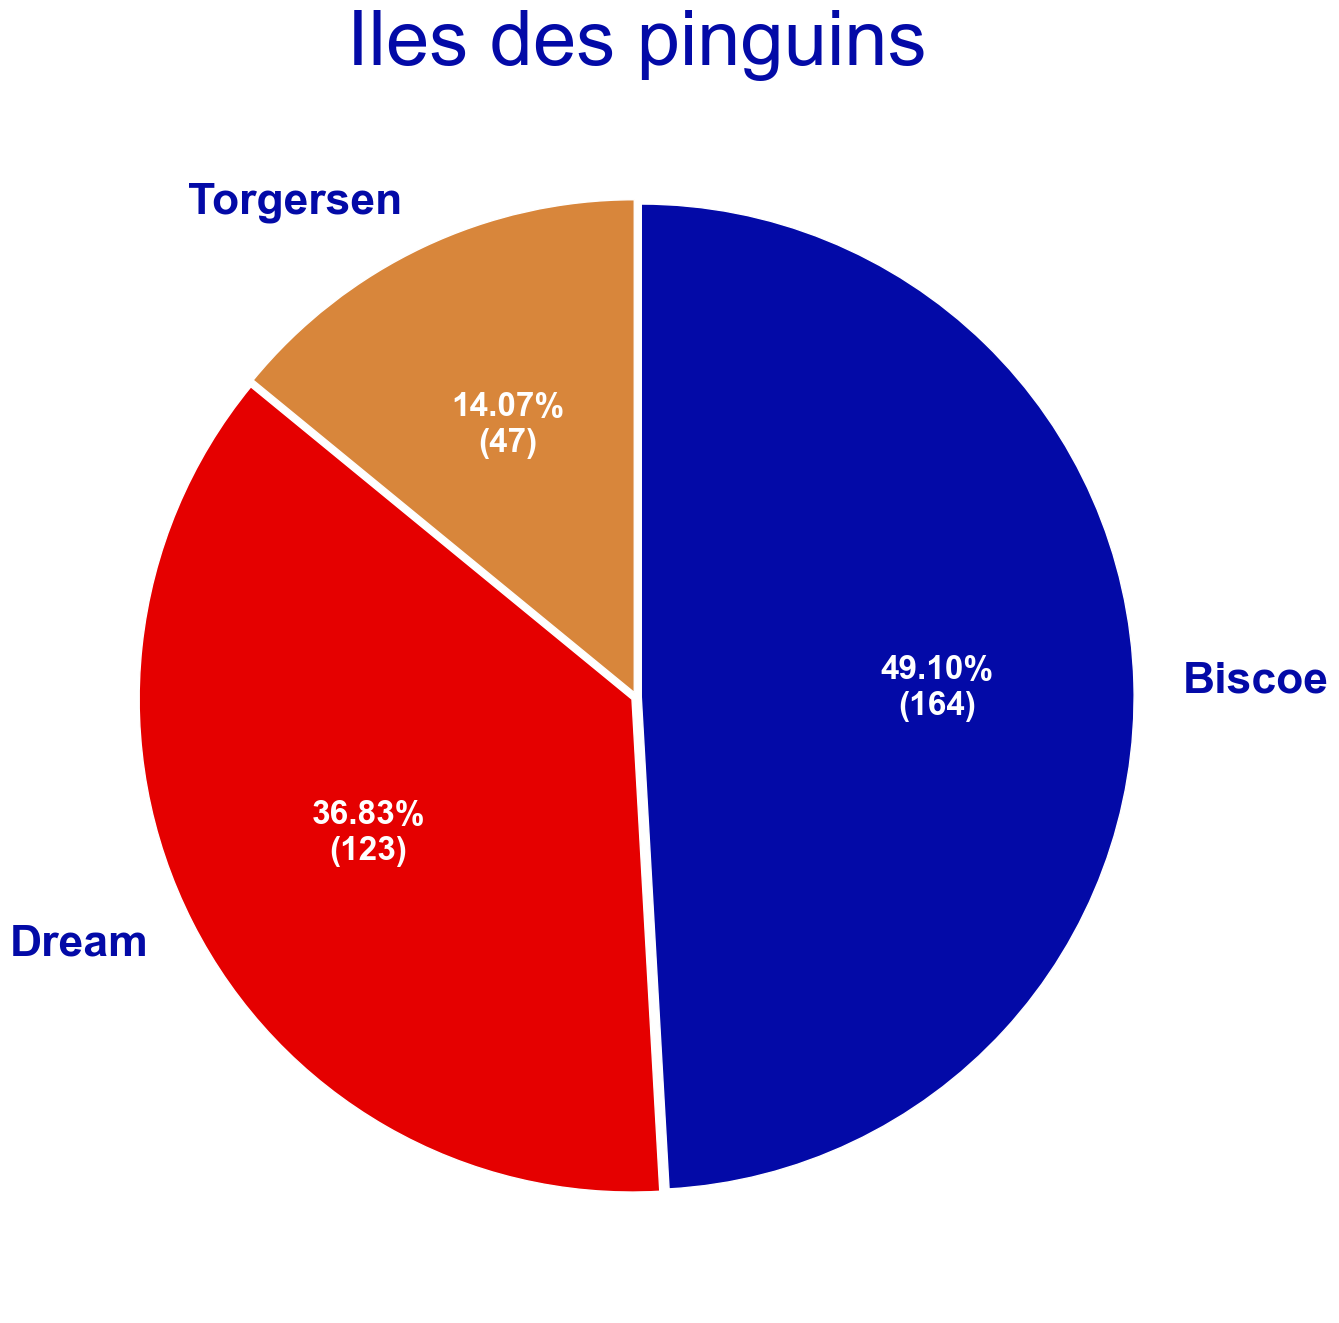

In [24]:
radius,size=0.8,0.3
fig,ax = plt.subplots(ncols=1,figsize=(16,16), subplot_kw=dict(aspect="equal"))

affichage = donnees.groupby('island').sex.count().reset_index().rename(columns={'sex':'nombre'})
affichage['%'] = affichage.nombre * 100 / affichage.nombre.sum()
affichage

wedges, texts, autotexts =  ax.pie(
         affichage['nombre'],
         autopct=lambda pct: formatPct(pct, affichage.nombre.values),   # autopct='%1.2f%%', 
         labels=affichage.island,
         # shadow=True, 
         counterclock=False,
         startangle=90 ,
         colors = palette,
         # pctdistance=0.4, 
         labeldistance=1.1, 
         textprops=dict(color="#030aa7"),
         explode=[0.01 for _ in range(affichage.island.count())]
      );
plt.setp(autotexts, size=24, weight="bold",color="w")
plt.setp(texts, size=32, weight="bold");
ax.set_title("Iles des pinguins",fontdict=dict(color="#030aa7", size=56));

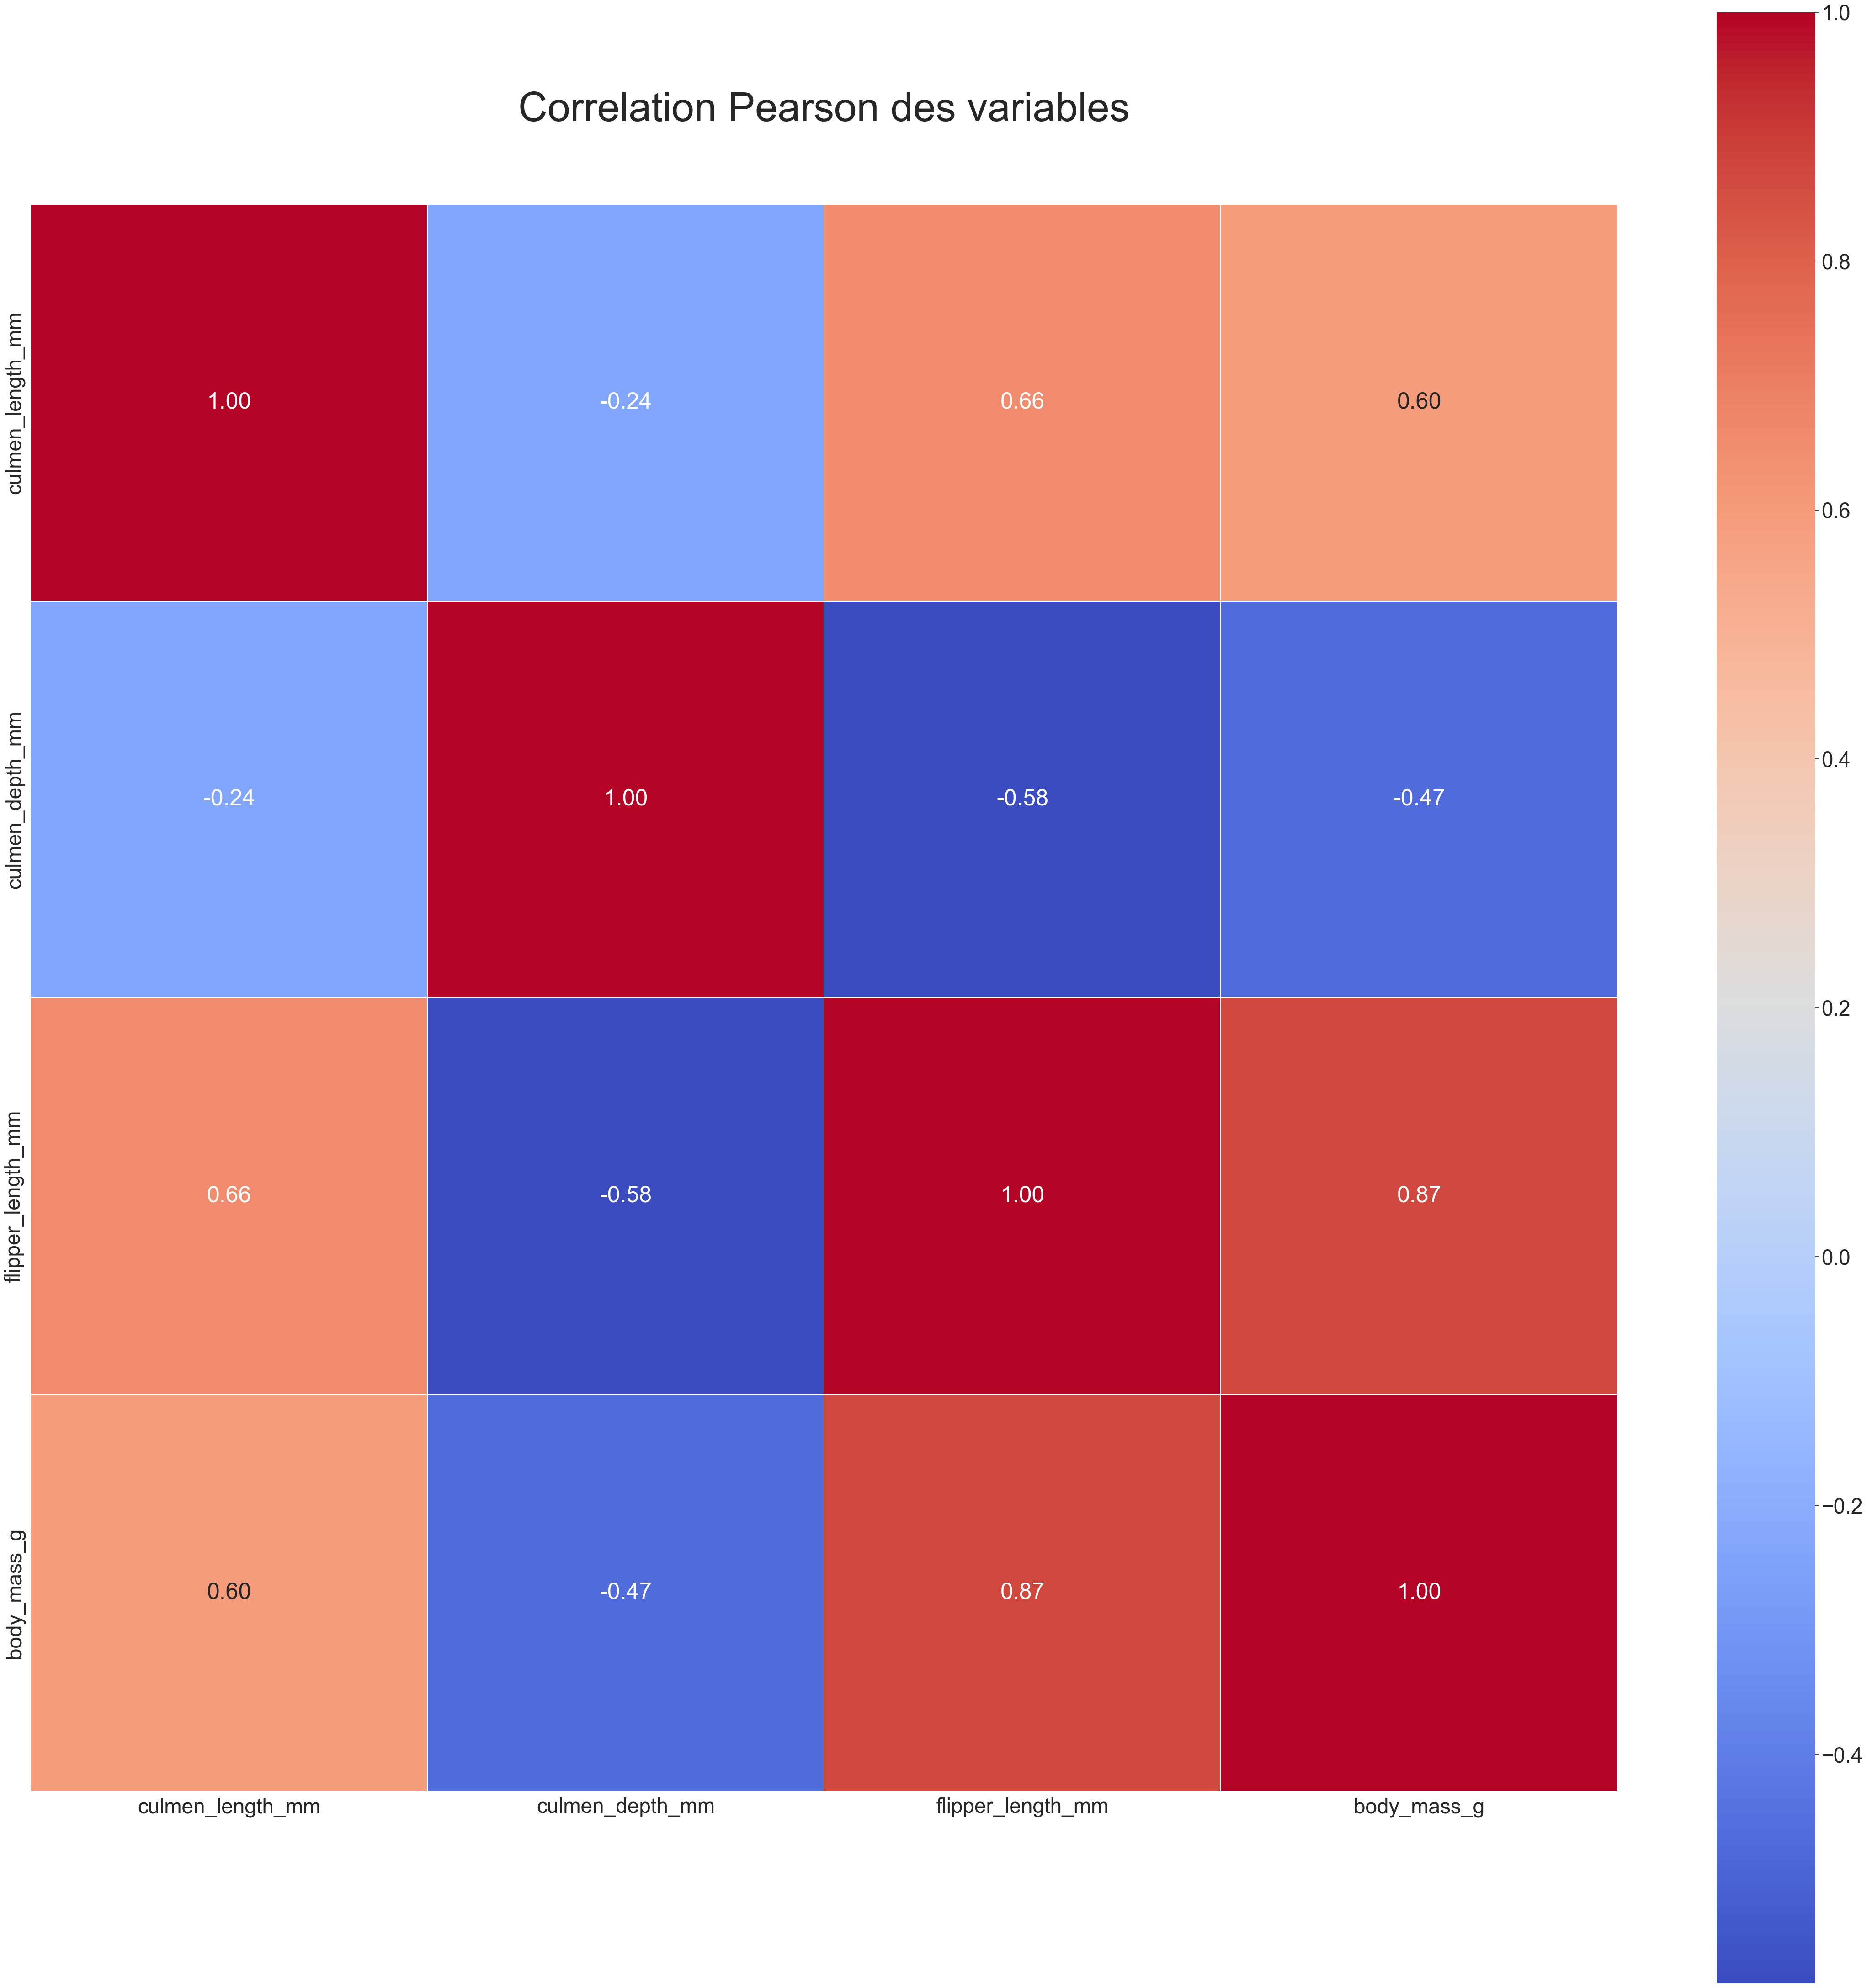

In [26]:
plt.figure(figsize=(56,56))
sns.set(font_scale=3)
plt.title('Correlation Pearson des variables', y=1.05, size=64)
sns.heatmap(donnees[quantitatives].corr(),linewidths=0.3, fmt= '.2f', #vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True)
# sauvegarderImage('Correlation Pearson des variables')   
sns.set(font_scale=2)

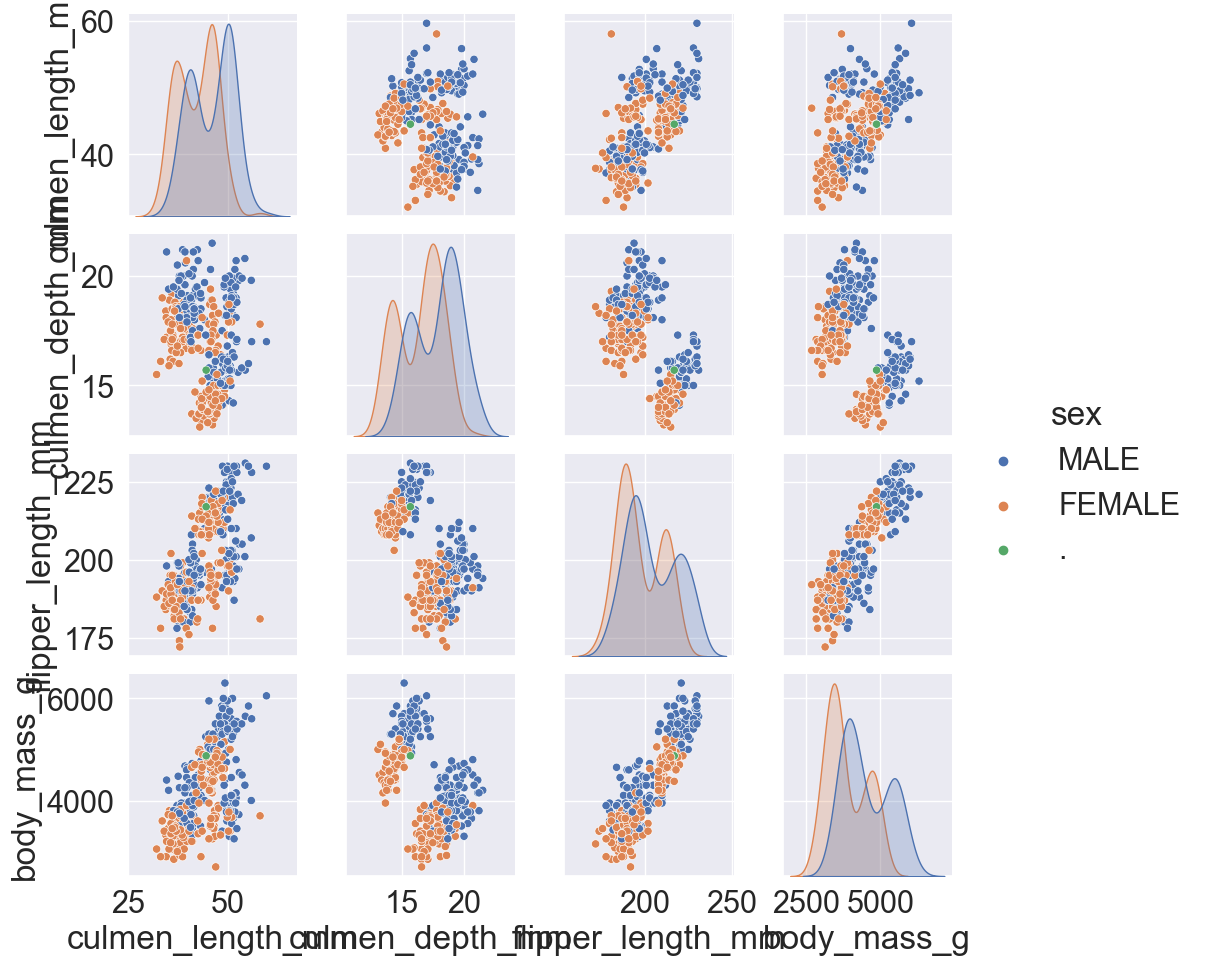

In [29]:
sns.pairplot(donnees, hue='sex')
plt.show()